In [1]:
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score, confusion_matrix, recall_score
import seaborn as sns
import numpy as np


# Testing bird classification

The purpose here is to test the whole test data within our test file. The test data is located in the "bird/test" directory, which needs to be downloaded if not within this current directory. Along side testing this model there is the "test.py" file which take a given input image from the "test/" folder and predicts the type of bird.

In [2]:
model = models.load_model("h5-model-2.h5")

2022-02-24 22:59:22.074808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-24 22:59:36.443440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7429 MB memory:  -> device: 0, name: Tesla M60, pci bus id: 0001:00:00.0, compute capability: 5.2


**Skip code below**

In [3]:
%cd 
%cd localfiles/

/home/azureuser
/home/azureuser/localfiles


In [4]:
img_data_gen = ImageDataGenerator(rescale=1/255) 
test_data = img_data_gen.flow_from_directory(
        directory="birds/test",
        target_size=(224,224),
        color_mode="rgb",
        class_mode="categorical",
        batch_size=32,
        shuffle=False,
)

Found 1250 images belonging to 250 classes.


## Precision, Recall
To section is measuring the precision and recall including the confusion matrix

In [5]:
Y_preds = model.predict(test_data, batch_size = 32)
y_preds = np.argmax(Y_preds, axis=1)

2022-02-24 22:59:41.123527: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101
2022-02-24 22:59:41.412093: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


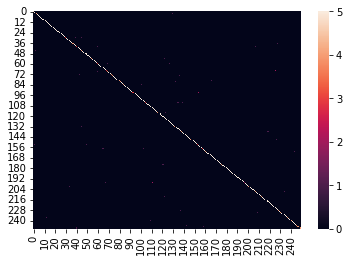

In [6]:
sns.heatmap(confusion_matrix(test_data.classes, y_preds))

The recall score and Precision score if very high. This indicates our model is working well at predicting true negatives/ true postives for birds. This issentially meaning that for each species of bird within our classfication our model manages to classify the bird correctly.

In [7]:
precision_score(test_data.classes, y_preds, average="micro")

0.9544

In [8]:
recall_score(test_data.classes, y_preds, average="micro")

0.9544